In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from torchvision import datasets, transforms
from tqdm import tqdm

In [ ]:
# load train
link_data_train = '/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set'
data_train = pathlib.Path(link_data_train)
link_img_train = (datasets.ImageFolder(link_data_train)).imgs
link_img_train = np.asarray(link_img_train)

# load test
link_data_test = '/content/drive/MyDrive/Đồ án CS331.N12/dataset/test_set'

# data_test = pathlib.Path(link_data_test)
link_img_test = np.asarray((datasets.ImageFolder(link_data_test)).imgs)

In [ ]:
def calcHist(img, bins_per_channel=20):
    '''
    img with shape (h, w, 3)
    '''
    # h, w = img.shape[:2]
    img_h, img_w, img_d = 224, 224, 3
    hist = [
            np.histogram(img[:,:, i], bins=20, range=(0, 256))[0]
            for i in range(3)
    ]
    hist = np.array(hist).ravel()
    hist = hist/(img_h*img_w) #normalize
    return hist

In [ ]:
# #all images
# from email.mime import image
# import glob
# inames = glob.glob("/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set/flowers/*")
# images = [
#             cv2.imread(iname)
#             for iname in inames
# ]
# #all histograms
# xs = [ 
#             calcHist(img)
#             for img in images
# ]

In [ ]:
# #input image
# from scipy.spatial import distance

# #input_img = images[0]

# input_img = cv2.imread('/content/drive/MyDrive/Đồ án CS331.N12/test/rose.jpg')

# #input_hist = xs[0]

# input_hist = calcHist(input_img)
# all_dists = [
#                 distance.euclidean(input_hist, xi)
#                 for xi in xs
# ]

# sorted_idxs = np.argsort(all_dists)

# ranked_images = [images[i] for i in sorted_idxs]

In [ ]:
# sorted_idxs

In [ ]:
# #plot top 10 images
# fig, ax = plt.subplots(2, 3, figsize=(15,7))
# fig.tight_layout()
# plt.subplot(2, 6, 1)
# plt.imshow(input_img[:,:,::-1])
# plt.title("Input", fontsize=10)
# for i in range(0, 10):
#     plt.subplot(2, 6, i+2)
#     idx = sorted_idxs[i]
#     found = ranked_images[i]
#     dist = all_dists[idx]
#     plt.imshow(found[:,:,::-1])
#     plt.title("Rank #{}, distance={:.2f}".format(i, dist), fontsize=10)
# plt.show()

##Gom cụm



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from PIL import Image
import tensorflow as tf
import pandas as pd

In [ ]:
img_h, img_w, img_d = 224, 224, 3
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_train,
                                                               label_mode = 'categorical',
                                                               image_size = (img_h, img_w),
                                                               batch_size = batch_size)
class_names = train_ds.class_names
class_names

Found 900 files belonging to 10 classes.


['beaches',
 'bus',
 'dinosaurs',
 'elephants',
 'flowers',
 'foods',
 'horses',
 'monuments',
 'mountains_and_snow',
 'peolpe_and_villages_in_Africa']

In [ ]:
link_img_train

array([['/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set/beaches/110.jpg',
        '0'],
       ['/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set/beaches/111.jpg',
        '0'],
       ['/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set/beaches/112.jpg',
        '0'],
       ...,
       ['/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set/peolpe_and_villages_in_Africa/97.jpg',
        '9'],
       ['/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set/peolpe_and_villages_in_Africa/98.jpg',
        '9'],
       ['/content/drive/MyDrive/Đồ án CS331.N12/dataset/training_set/peolpe_and_villages_in_Africa/99.jpg',
        '9']], dtype='<U99')

In [ ]:
def load_image(link):
  img = np.array(Image.open(link[0]))
  img = np.resize(img, (img_h,img_w,img_d))
  # img = np.expand_dims(img,axis=0)
  output = calcHist(img) # rút trích đặc trưng
  return output
def plot_result(link, database, label_list):
  # lấy ra top 10
  plt.figure(figsize=(20,12))
  columns = 5
  image = Image.open(link[0])
  image = np.asarray(image)
  ax = plt.subplot(3, columns, 1)
  ax.set_title(f"Query: {link[0].split('/')[-1]},\n name: {label_list[int(link[1])]}")
  ax.set_axis_off()
  plt.imshow(image)
  for i in range(10):
    image = Image.open(database[0][i])
    image = np.asarray(image)
    ax = plt.subplot(3, columns, i + 1 + 5)        
    ax.set_axis_off()
    ax.set_title(f"Query: {database[0][i].split('/')[-1]},\n name: {label_list[int(database[1][i])]}, \n cosine = {database[3][i]}")
    plt.imshow(image)

In [ ]:
ls = []
# for data in tqdm(train_ds):
#     image, label = data
#     output = np.asarray(model(image))
#     ls.append(output)
# ls = np.concatenate(ls)
for data in tqdm(link_img_train):
  image, label = data[0], data[1]
  img = np.array(Image.open(image))
  img = np.resize(img, (img_h,img_w,img_d))

  hist = calcHist(img)
  # img = np.expand_dims(img,axis=0)
  # output = np.asarray(model_fine.predict(img)).reshape((-1))
  # print('Shape = ', output.shape)
  ls.append(hist)

100%|██████████| 900/900 [10:19<00:00,  1.45it/s]


In [ ]:
ls[1].shape

(60,)

In [ ]:
metric = 'cosine'   #'l2' 

# tuần tự
def find_similarity(link, link_database, label_list, plot = True):
  img = load_image(link)
  print(img.shape)

  # tính cosine
  data = []
  for i, mem in enumerate(link_database):
    a = mem[0]  # link ảnh
    b = mem[1]  # nhãn ảnh đó
    c = ls[i]
    dis = cosine_similarity(img.reshape((1,-1)),c.reshape((1,-1)))
    data.append([a,b,c, dis])

  # sắp xếp theo cosine
  dataf = pd.DataFrame(data)
  dataf = dataf.sort_values(by=[3], ascending = False)
  dataf = dataf.reset_index(drop=True)
  if plot == True:
    plot_result(link, dataf, label_list)
  else:
    return np.asarray(dataf.head(100)[1], dtype = int)
    
# KNN
k = 100
knn = NearestNeighbors(n_neighbors=k, metric=metric)
knn.fit(ls)
def find_similarity_knn(link, link_database, label_list, plot = True):
    img = load_image(link)
    distance, neighbors_idx = knn.kneighbors(img.reshape((1,-1)))
    neighbors_idx = [int(i) for i in neighbors_idx[0]]
    distance = distance.reshape((-1))
    data = []
    for i in range (len(neighbors_idx)):
      a = link_database[neighbors_idx[i]][0]
      b = link_database[neighbors_idx[i]][1]
      c = ls[neighbors_idx[i]]
      cosine = 1 - distance[i]
      data.append([a,b,c, cosine])
    data = pd.DataFrame(data)
    if plot == True:
      plot_result(link, data, label_list)
    else:
      return np.asarray(data.head(100)[1], dtype = int)

(60,)


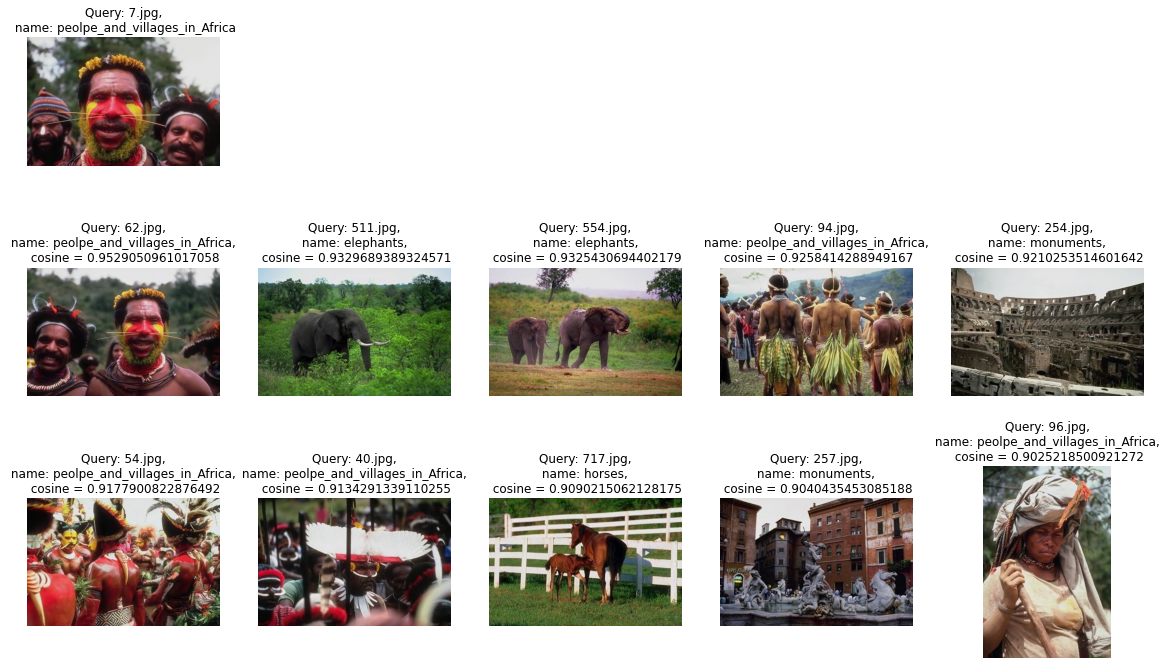

In [ ]:
link = link_img_test[97]
d1 = find_similarity_knn(link, link_img_train, class_names, plot = True)
d2 = find_similarity(link, link_img_train, class_names, plot = False)

##Đánh giá

In [ ]:
# thời gian chạy
# kết quả
def predict(input): 
  """
  input: mảng gồm n (ảnh, nhãn)
  output: mảng gồm n phần tử, trong đó mỗi phần tử là 1 mảng chứa 10 ảnh
  """
  pred = []
  for i in tqdm(input):
    temp = find_similarity_knn(i, link_img_train, class_names, plot = False)
    pred.append(temp)
  return pred

In [ ]:
X = np.asarray(link_img_test[:,0])
y_true = np.asarray(link_img_test[:,1], dtype = int)
y_pred = predict(link_img_test)

100%|██████████| 100/100 [01:08<00:00,  1.46it/s]


In [ ]:
def p_at_k(y_pred, y_true, k=10):
  score = 0
  for i in range (k):
    if y_pred[i] == y_true:
      score +=1
  return score/k
def r_at_k(y_pred, y_true, ny_database, k):
  score = 0
  for i in range (k):
    if y_pred[i] == y_true:
      score +=1
  return score/ny_database
def average_p(y_pred, y_true):
  score = 0
  num = 0
  for i in range (len(y_pred)):
    if y_pred[i] == y_true:
      score+=p_at_k(y_pred[:i+1], y_true, k=i+1)
      num+=1
  if num == 0:
    return 0
  return score/num
def MAP(list_y_pred, list_y_true):
  score = 0
  for i in range(len(list_y_pred)):
    score+=average_p(list_y_pred[i], list_y_true[i])
  return score/len(list_y_pred)

In [ ]:
# import collections, numpy
# counter = collections.Counter(link_img_train[:,1])
# counter[str(0)]
# print(p_at_k(y_pred[1], y_true[1], k=10))
# print(r_at_k(y_pred[1], y_true[1],counter[str(y_true[1])]))
# print(average_p(y_pred[1], y_true[1]))
# print(MAP(y_pred,y_true))

In [ ]:
# result = []
# P@1
p1_score = []
for i in range(len(y_pred)):
  p1_score.append(p_at_k(y_pred[i], y_true[i], k=1))
print('P@1 = ',sum(p1_score)/len(p1_score))
# P@5
p5_score = []
for i in range(len(y_pred)):
  p5_score.append(p_at_k(y_pred[i], y_true[i], k=5))
print('P@5 = ',sum(p5_score)/len(p5_score))
# P@10
p10_score = []
for i in range(len(y_pred)):
  p10_score.append(p_at_k(y_pred[i], y_true[i], k=10))
print('P@10 = ',sum(p10_score)/len(p10_score))
# P@90
p90_score = []
for i in range(len(y_pred)):
  p90_score.append(p_at_k(y_pred[i], y_true[i], k=90))
print('P@90 = ',sum(p90_score)/len(p90_score))
# R@1
import collections, numpy
number_each_class = collections.Counter(link_img_train[:,1])
r1_score = []
for i in range(len(y_pred)):
  r1_score.append(r_at_k(y_pred[i], y_true[i], number_each_class[str(y_true[i])], k=1))
print('R@1 = ',sum(r1_score)/len(r1_score))
# R@5
r5_score = []
for i in range(len(y_pred)):
  r5_score.append(r_at_k(y_pred[i], y_true[i], number_each_class[str(y_true[i])], k=5))
print('R@5 = ',sum(r5_score)/len(r5_score))
# R@10
r10_score = []
for i in range(len(y_pred)):
  r10_score.append(r_at_k(y_pred[i], y_true[i], number_each_class[str(y_true[i])], k=10))
print('R@10 = ',sum(r10_score)/len(r10_score))
# R@90
r90_score = []
for i in range(len(y_pred)):
  r90_score.append(r_at_k(y_pred[i], y_true[i], number_each_class[str(y_true[i])], k=90))
print('R@90 = ',sum(r90_score)/len(r90_score))
# AP
AP_score = []
for i in range(len(y_pred)):
  AP_score.append(average_p(y_pred[i], y_true[i]))
# MAP
print('MAP = ',sum(AP_score)/len(AP_score))

P@1 =  0.6
P@5 =  0.5379999999999997
P@10 =  0.4859999999999998
P@90 =  0.3152222222222222
R@1 =  0.006666666666666663
R@5 =  0.029888888888888857
R@10 =  0.05399999999999995
R@90 =  0.3152222222222222
MAP =  0.44865632155952945


##Lưu lại

In [ ]:
np.savetxt("feature.txt", np.asarray(ls), fmt='%5s')
ls = np.loadtxt("feature.txt", dtype=object)
ls

array([['0.15824298469387754', '0.15674824617346939',
        '0.16563695790816327', ..., '0.00932716836734694',
        '0.006596779336734694', '0.0024513711734693877'],
       ['0.3383689413265306', '0.11481584821428571',
        '0.10419323979591837', ..., '0.0', '0.0', '0.0'],
       ['0.4268773915816326', '0.05277423469387755',
        '0.07503587372448979', ..., '0.04300860969387755',
        '0.0034279336734693877', '0.00011957908163265306'],
       ...,
       ['0.012216996173469387', '0.030831473214285716',
        '0.04137436224489796', ..., '0.001753826530612245',
        '0.0001992984693877551', '0.0'],
       ['0.005520567602040816', '0.01225685586734694',
        '0.02100605867346939', ..., '0.0024713010204081634',
        '0.0018734056122448979', '0.0014548788265306123'],
       ['0.09058115433673469', '0.13645966198979592',
        '0.10138313137755102', ..., '0.006816007653061225',
        '0.0020129145408163264', '1.992984693877551e-05']], dtype=object)